In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\jalpa\\Downloads\\data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
col = [var for var in df.columns if df[var].isnull().mean()*100 <5 and df[var].isnull().mean()*100 > 0]

In [7]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[col]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [9]:
len(df[col].dropna())/len(df) 

0.8968577095730244

In [10]:
new_df = df[col].dropna()
new_df.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14499,0.897,no_enrollment,Graduate,9.0,25.0
8419,0.804,no_enrollment,Graduate,5.0,13.0
17268,0.920,no_enrollment,Graduate,13.0,226.0
8215,0.722,Part time course,High School,1.0,56.0
13175,0.884,no_enrollment,Masters,17.0,20.0


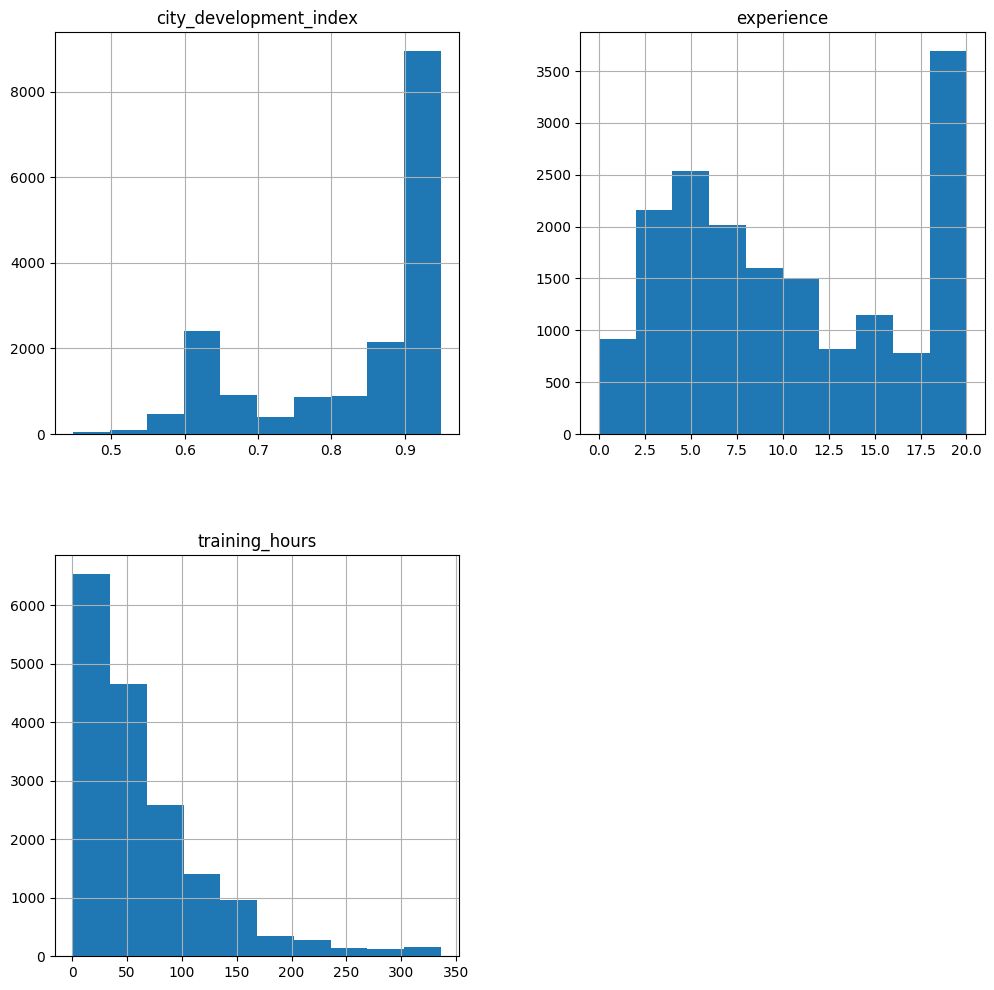

In [11]:
import matplotlib.pyplot as plt 
new_df.hist(figsize = (12,12))
plt.show()

<Axes: >

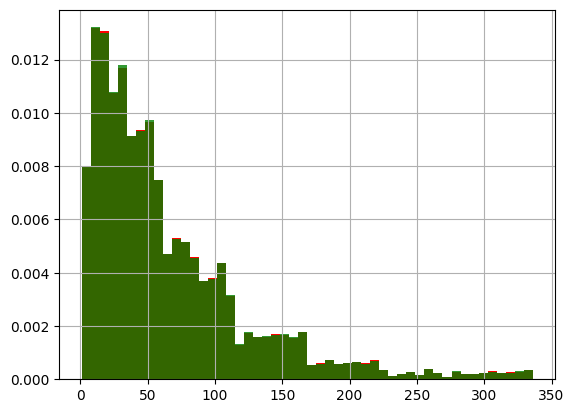

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins = 50, ax = ax, density = True, color = 'red')

new_df['training_hours'].hist(bins = 50, ax = ax, color = 'green', density = True, alpha = 0.8)

<Axes: >

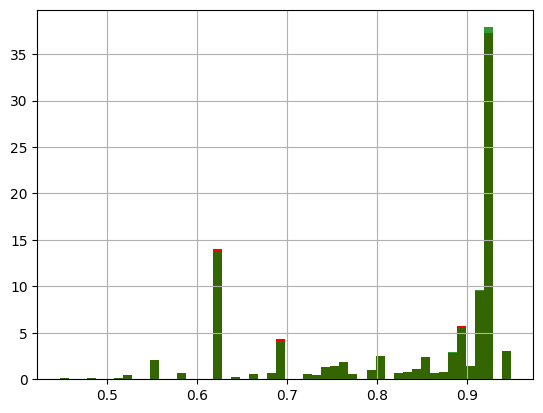

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins = 50, ax = ax, density = True, color = 'red')

new_df['city_development_index'].hist(bins = 50, ax = ax, color = 'green', density = True, alpha = 0.8)

<Axes: >

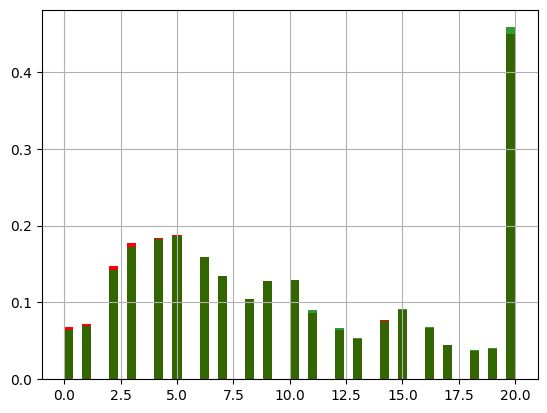

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins = 50, ax = ax, density = True, color = 'red')

new_df['experience'].hist(bins = 50, ax = ax, color = 'green', density = True, alpha = 0.8)

<Axes: ylabel='Density'>

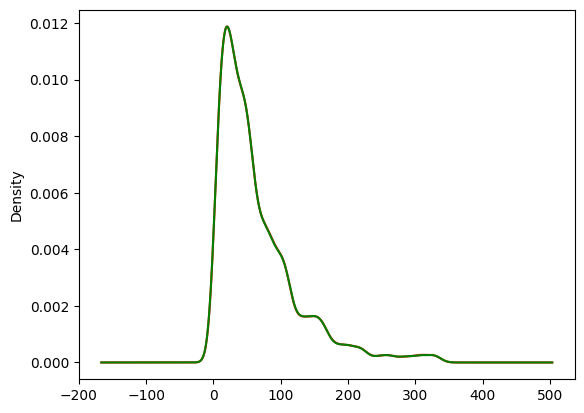

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color = 'red')

new_df['training_hours'].plot.density(color = 'green')

# Categorical Data

In [16]:
temp = pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis = 1)

#add columns names
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
